In [2]:
from keras.datasets import mnist
from keras import models
from keras import layers
#from keras.utils import to_categorical
from matplotlib import pyplot
#from keras.utils import plot_model
from IPython.display import Image
import tensorflow as tf


In [3]:
(trainX, trainY), (testX, testY) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [4]:
#Step 1: Load the collected data, Visuvalize it

(trainX, trainY), (testX, testY) = mnist.load_data()


print('The type of object is ..')
print(type(trainX))

numberofTrainingsamples = trainX.shape[0]
print("number of Training samples = " + str(numberofTrainingsamples))

print( "Shape of trainX: "+ str(trainX.shape) + ".   Shape of trainY" + str( trainY.shape))
print( "Shape of testX: "+ str(testX.shape) )


print("number of Test samples = " + str(testX.shape[0]))



The type of object is ..
<class 'numpy.ndarray'>
number of Training samples = 60000
Shape of trainX: (60000, 28, 28).   Shape of trainY(60000,)
Shape of testX: (10000, 28, 28)
number of Test samples = 10000


TrainY [76] is labels as = 2
TrainX [76] is a image and looks like this...


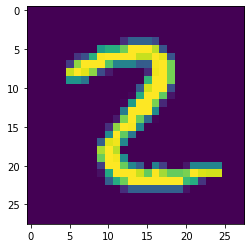

This is a 2 dimensional array and its value is
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  34  80  80  80  58   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 138 159 159 199 254 254 254 228  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  39  62 160 252 254 254 254 254 233 233 254 245
   67   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0  45 212 254 254 254 186 114 114 114  74  75 251 254
  201   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0

In [5]:
print("TrainY [76] is labels as = " + str(trainY[76]))
print("TrainX [76] is a image and looks like this...")
pyplot.imshow(trainX[76])
pyplot.show()
print("This is a 2 dimensional array and its value is") 
print(trainX[76])
print( "Shape of this image is "+ str(trainX[76].shape) )



In [6]:
#Step 2: Prepare the data (vectorize, reshape, normalize, OHE)

print("trainY: "+ str(trainY[2]))
trainYready = tf.keras.utils.to_categorical(trainY)
print("trainYOHE: "+ str(trainYready[2]))
testYready = tf.keras.utils.to_categorical(testY)



trainY: 4
trainYOHE: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


In [7]:

trainXnormalized =  trainX.astype('float32') / 255

testXnormalized = testX.astype('float32')/ 255

trainXnormalized [1000] is a image and looks like this...


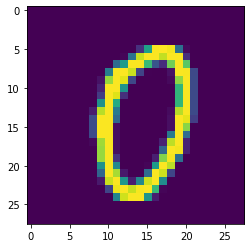

Shape of this image is (28, 28)
This is a 2 dimensional array and its value is
[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.


In [8]:
print("trainXnormalized [1000] is a image and looks like this...")
pyplot.imshow(trainXnormalized[1000])
pyplot.show()
print( "Shape of this image is "+ str(trainXnormalized[1000].shape) )
print("This is a 2 dimensional array and its value is") 
print(trainXnormalized[1000])



In [9]:
print("Shape of trainXnormalized[0] is "+ str(trainXnormalized.shape[0]))


print( "\n Shape of trainXnormalized is "+ str(trainXnormalized.shape) )

trainXready = trainXnormalized.reshape( trainXnormalized.shape[0], 28*28 )

testXready = testXnormalized.reshape( testXnormalized.shape[0], 28*28 )

print( " Shape of trainXready is      "+ str(trainXready.shape) )





Shape of trainXnormalized[0] is 60000

 Shape of trainXnormalized is (60000, 28, 28)
 Shape of trainXready is      (60000, 784)


# Define the network architecture







In [45]:
#Step 3: Define the network architecture
model = models.Sequential(name='model')
layer1 = layers.Dense(512, input_shape=(28*28,), activation='relu')
model.add(layer1)
layer2 = layers.Dense(128, activation='relu')
model.add(layer2)
layer3 = layers.Dense(10, activation='softmax')
model.add(layer3)


In [13]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 512)               401920    
                                                                 
 dense_4 (Dense)             (None, 128)               65664     
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________


# Choose the loss funtion

In [46]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


#Train the network

In [47]:

history=model.fit( trainXready, trainYready, batch_size=32, epochs=10)


Epoch 1/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1910 - accuracy: 0.9421
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0798 - accuracy: 0.9751
Epoch 3/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0549 - accuracy: 0.9825
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0391 - accuracy: 0.9872
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0308 - accuracy: 0.9903
Epoch 6/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0265 - accuracy: 0.9911
Epoch 7/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0219 - accuracy: 0.9932
Epoch 8/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0202 - accuracy: 0.9934
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0199 - accuracy: 0.9940
Epoch 10/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.014

In [49]:
#Evaluate the network
metrics_test_loss, metrics_test_accuracy = model.evaluate(testXready, testYready)

print(" Loss on test data is: " + str(metrics_test_loss))
print(" Accuracy of my nerual network on test data in percentage is : " + str(metrics_test_accuracy* 100))



313/313 [==============================] - 1s 3ms/step - loss: 0.0977 - accuracy: 0.9812
 Loss on test data is: 0.09765718132257462
 Accuracy of my nerual network on test data in percentage is : 98.11999797821045


# Predict what class a image belongs to

Predicited class is : 2
My nerual network predicts the below image as : 2


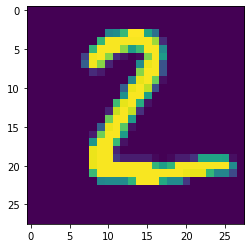

In [51]:
import numpy as np

#Step 7: Predict


predictedResults = model.predict(testXready[1:2])

predictedclass = predictedResults.argmax()
print("Predicited class is : " + str(predictedclass))

print("My nerual network predicts the below image as : " + str(predictedclass))


pyplot.imshow(testX[1])
pyplot.show()


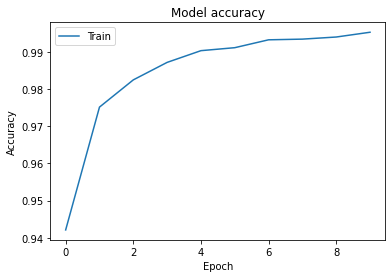

In [52]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

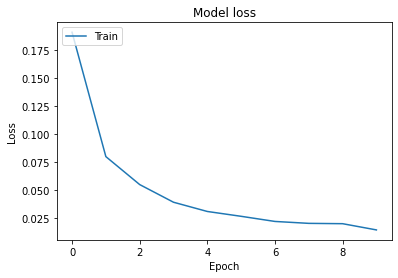

In [53]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()